In [238]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from __future__ import print_function
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor
from __future__ import print_function
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [239]:

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
test_data = pd.read_csv(r"C:\\Users\anish.majumdar\Downloads\cs-test.csv")
train_data = pd.read_csv(r"C:\\Users\anish.majumdar\Downloads\cs-training.csv")
print(train_data.describe())
print(train_data.columns)
print(test_data.describe())
print(test_data.columns)

          Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  150000.000000     150000.000000                         150000.000000   
mean    75000.500000          0.066840                              6.048438   
std     43301.414527          0.249746                            249.755371   
min         1.000000          0.000000                              0.000000   
25%     37500.750000          0.000000                              0.029867   
50%     75000.500000          0.000000                              0.154181   
75%    112500.250000          0.000000                              0.559046   
max    150000.000000          1.000000                          50708.000000   

                 age  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  \
count  150000.000000                         150000.000000  150000.000000   
mean       52.295207                              0.421033     353.005076   
std        14.771866                            

In [240]:
print(train_data.shape,test_data.shape)

(150000, 12) (101503, 12)


In [241]:
summiss=train_data.isnull().sum()
print("NULL list in train\n",summiss,'\n')
summiss1=test_data.isnull().sum()
print("NULL list in test\n",summiss1)

NULL list in train
 Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64 

NULL list in test
 Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90Day

AxesSubplot(0.125,0.125;0.775x0.755)


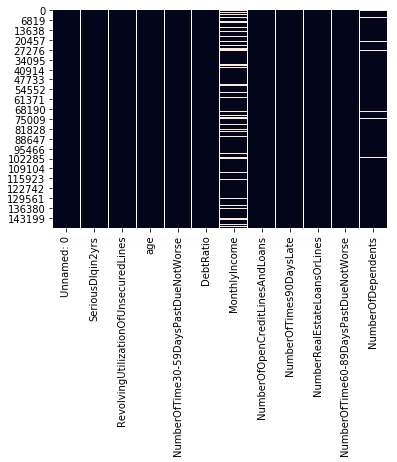

In [242]:
#visualise missing values
print(sns.heatmap(train_data.isnull(), cbar=False))


AxesSubplot(0.125,0.125;0.775x0.755)


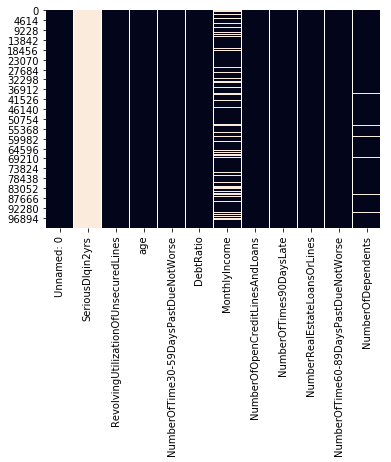

In [243]:
print(sns.heatmap(test_data.isnull(), cbar=False))

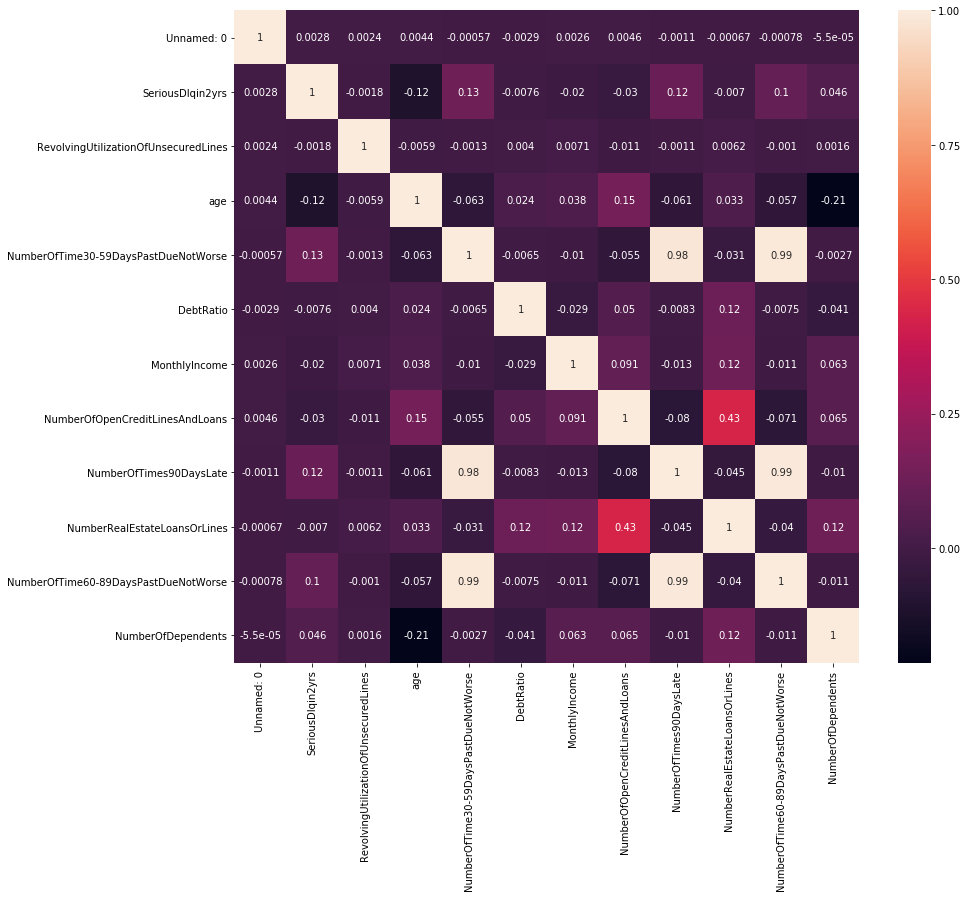

In [244]:
#correlation betweek featues if train
corr = train_data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2g")

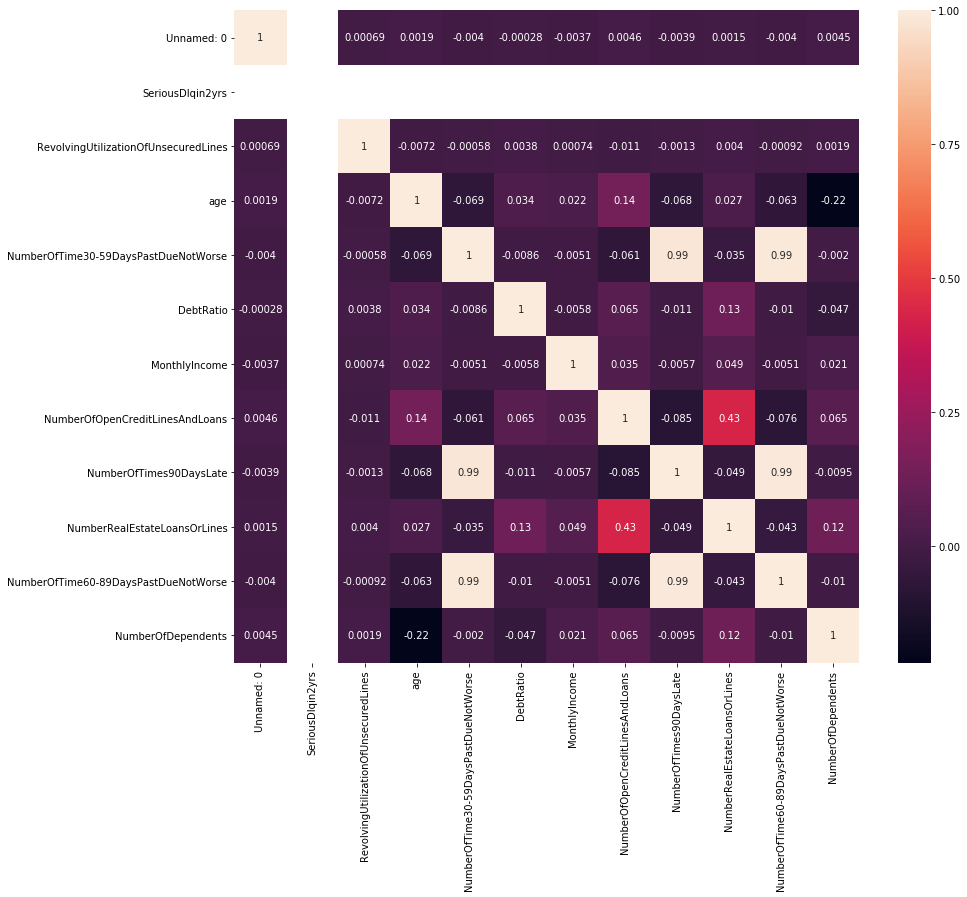

In [245]:
#correlation betweek featues of test
corr = test_data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2g")

In [246]:
'''test_data.loc[test_data["age"] ==0]= test_data.age.median()

test_data.loc[(test_data["age"] >= 18) & (test_data["age"] < 60) & (test_data["MonthlyIncome"].isnull()),"MonthlyIncome"] = test_data.loc[(train_data["age"] >= 18) & (test_data["age"] < 60)].MonthlyIncome.mean() 

test_data.loc[(test_data["age"] >= 60) & (test_data["MonthlyIncome"].isnull()),"MonthlyIncome"]=test_data.loc[(test_data["age"] >= 60)].MonthlyIncome.mean()

test_data["NumberOfDependents"] = test_data["NumberOfDependents"].fillna(0)

sns.heatmap(test_data.isnull(), cbar=False)
print(test_data)'''

'test_data.loc[test_data["age"] ==0]= test_data.age.median()\n\ntest_data.loc[(test_data["age"] >= 18) & (test_data["age"] < 60) & (test_data["MonthlyIncome"].isnull()),"MonthlyIncome"] = test_data.loc[(train_data["age"] >= 18) & (test_data["age"] < 60)].MonthlyIncome.mean() \n\ntest_data.loc[(test_data["age"] >= 60) & (test_data["MonthlyIncome"].isnull()),"MonthlyIncome"]=test_data.loc[(test_data["age"] >= 60)].MonthlyIncome.mean()\n\ntest_data["NumberOfDependents"] = test_data["NumberOfDependents"].fillna(0)\n\nsns.heatmap(test_data.isnull(), cbar=False)\nprint(test_data)'

In [247]:
#removing 0 aged people
train_data.loc[train_data["age"] ==0]
test_data.loc[train_data["age"] ==0]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,65696,NaN,0.312623,59,1,6.058023,5583.0,20,0,1,0,1.0


In [248]:
train_data.loc[train_data["age"] ==0]= train_data.age.median()
test_data.loc[test_data["age"] ==0]= test_data.age.median()

In [249]:
#removing null from monthly income by imputing average income for that particular age group
train_data.loc[(train_data["age"] >= 18) & (train_data["age"] < 60) & (train_data["MonthlyIncome"].isnull())]


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6,7.0,0.0,0.305682,57.0,0.0,5710.0,NaN,8.0,0.0,3.0,0.0,0.0
8,9.0,0.0,0.116951,27.0,0.0,46.0,NaN,2.0,0.0,0.0,0.0,NaN
58,59.0,0.0,0.541109,43.0,0.0,2477.0,NaN,3.0,0.0,1.0,0.0,2.0
86,87.0,0.0,0.360510,58.0,1.0,3282.0,NaN,8.0,0.0,2.0,0.0,0.0
92,93.0,0.0,0.784836,52.0,0.0,2662.0,NaN,10.0,0.0,2.0,1.0,0.0
96,97.0,0.0,0.542243,48.0,2.0,10.0,NaN,2.0,0.0,0.0,0.0,NaN
124,125.0,0.0,0.277957,39.0,0.0,4090.0,NaN,9.0,0.0,2.0,0.0,0.0
130,131.0,0.0,0.175728,43.0,1.0,994.0,NaN,4.0,0.0,1.0,0.0,0.0
143,144.0,0.0,0.362484,27.0,0.0,567.0,NaN,4.0,0.0,0.0,0.0,0.0
161,162.0,0.0,0.070772,38.0,0.0,2088.0,NaN,6.0,0.0,1.0,0.0,0.0


In [250]:
test_data.loc[(test_data["age"] >= 18) & (test_data["age"] < 60) & (test_data["MonthlyIncome"].isnull())]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
19,20.0,NaN,0.686406,43.0,0.0,487.0,NaN,10.0,0.0,0.0,0.0,1.0
25,26.0,NaN,0.125267,51.0,0.0,3825.0,NaN,10.0,0.0,2.0,0.0,0.0
29,30.0,NaN,0.024445,47.0,0.0,5810.0,NaN,20.0,0.0,2.0,0.0,2.0
31,32.0,NaN,0.000000,55.0,0.0,2007.0,NaN,5.0,0.0,1.0,0.0,0.0
37,38.0,NaN,0.142127,56.0,0.0,4009.0,NaN,9.0,0.0,2.0,0.0,2.0
70,71.0,NaN,0.304505,53.0,0.0,1909.0,NaN,8.0,0.0,1.0,0.0,0.0
80,81.0,NaN,0.085647,47.0,0.0,577.0,NaN,9.0,0.0,0.0,0.0,NaN
87,88.0,NaN,0.000000,45.0,0.0,743.0,NaN,8.0,0.0,1.0,0.0,0.0
104,105.0,NaN,0.001887,37.0,1.0,2705.0,NaN,15.0,0.0,3.0,0.0,0.0
110,111.0,NaN,0.178283,54.0,0.0,6971.0,NaN,17.0,0.0,1.0,0.0,0.0


In [251]:
train_data.loc[(train_data["age"] >= 18) & (train_data["age"] < 60) & (train_data["MonthlyIncome"].isnull()),"MonthlyIncome"] = train_data.loc[(train_data["age"] >= 18) & (train_data["age"] < 60)].MonthlyIncome.mean() 
test_data.loc[(test_data["age"] >= 18) & (test_data["age"] < 60) & (test_data["MonthlyIncome"].isnull()),"MonthlyIncome"] = test_data.loc[(test_data["age"] >= 18) & (test_data["age"] < 60)].MonthlyIncome.mean() 

In [252]:
train_data.loc[(train_data["age"] >= 60) & (train_data["MonthlyIncome"].isnull())]


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
16,17.0,0.0,0.061086,78.0,0.0,2058.0,NaN,10.0,0.0,2.0,0.0,0.0
32,33.0,0.0,0.083418,62.0,0.0,977.0,NaN,6.0,0.0,1.0,0.0,0.0
41,42.0,0.0,0.072898,81.0,0.0,75.0,NaN,7.0,0.0,0.0,0.0,0.0
52,53.0,0.0,1.000000,62.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0
62,63.0,0.0,0.101156,72.0,0.0,1720.0,NaN,12.0,0.0,2.0,0.0,0.0
71,72.0,0.0,0.142013,67.0,0.0,1824.0,NaN,7.0,0.0,2.0,0.0,0.0
100,101.0,0.0,0.013025,61.0,0.0,15.0,NaN,4.0,0.0,0.0,0.0,0.0
109,110.0,0.0,0.041258,61.0,0.0,4739.0,NaN,11.0,0.0,4.0,0.0,NaN
115,116.0,0.0,0.007508,74.0,0.0,7.0,NaN,4.0,0.0,0.0,0.0,0.0
118,119.0,0.0,0.007521,68.0,0.0,269.0,NaN,4.0,0.0,0.0,0.0,0.0


In [253]:

#removing null from monthly income by inputing average income for that particular age group
train_data.loc[(train_data["age"] >= 60) & (train_data["MonthlyIncome"].isnull()),"MonthlyIncome"]=train_data.loc[(train_data["age"] >= 60)].MonthlyIncome.mean()
test_data.loc[(test_data["age"] >= 60) & (test_data["MonthlyIncome"].isnull()),"MonthlyIncome"]=test_data.loc[(test_data["age"] >= 60)].MonthlyIncome.mean()

In [254]:
#imputing dependants missing values with mode which is 0
train_data["NumberOfDependents"] = train_data["NumberOfDependents"].fillna(0)
test_data["NumberOfDependents"] = test_data["NumberOfDependents"].fillna(0)

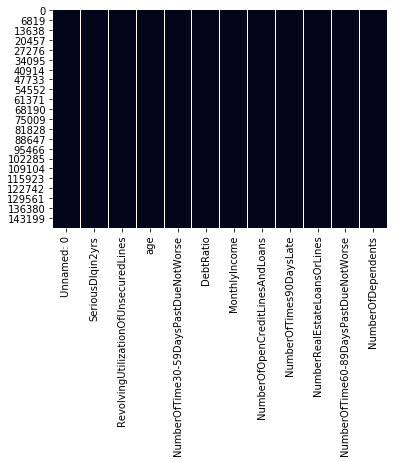

In [255]:
#visualise missing values NONE ARE LEFT ANYMORE
sns.heatmap(train_data.isnull(), cbar=False)

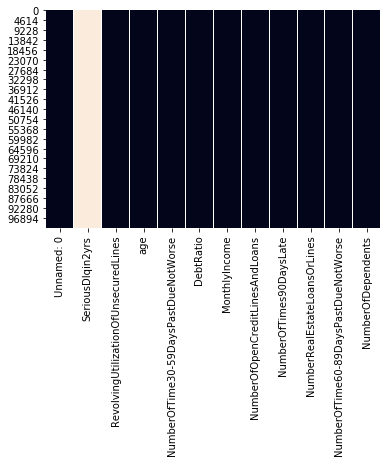

In [256]:
sns.heatmap(test_data.isnull(), cbar=False)#only target is null in test set by design

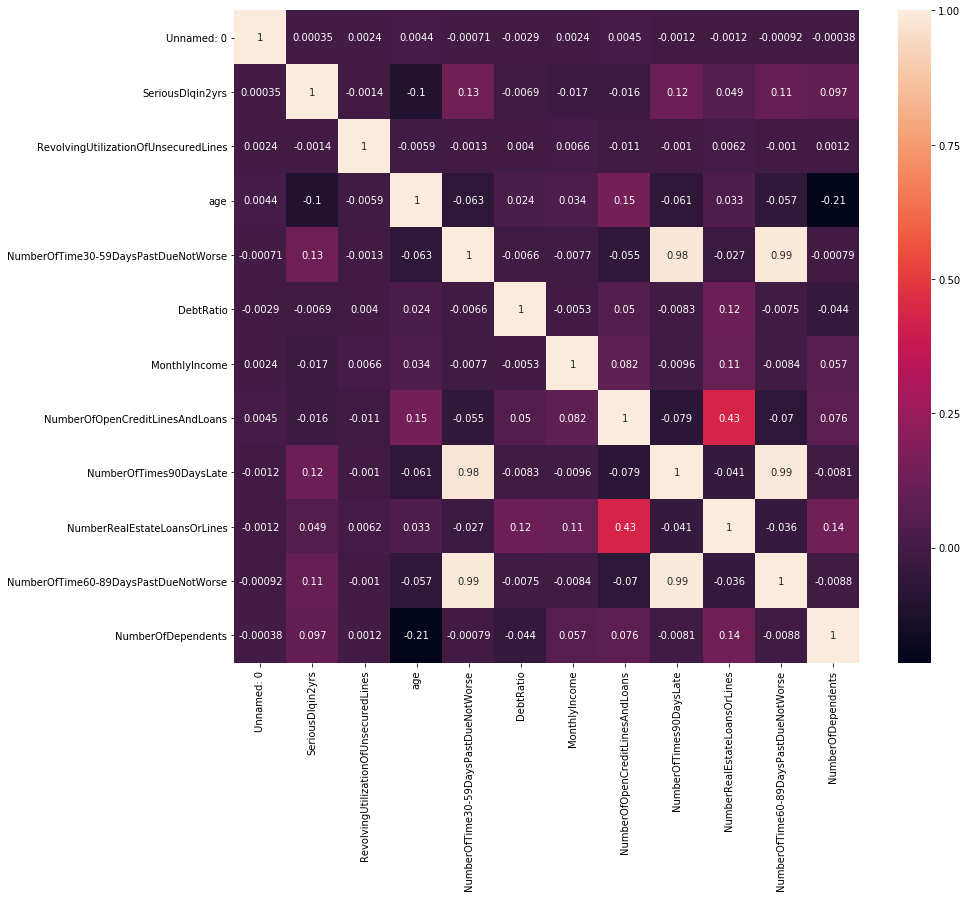

In [257]:
corr = train_data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2g")

In [258]:
# Combining the columns contains similar information 
train_data["CombinedDefaulted"] = (train_data["NumberOfTimes90DaysLate"] + train_data["NumberOfTime60-89DaysPastDueNotWorse"]) + train_data["NumberOfTime30-59DaysPastDueNotWorse"]
test_data["CombinedDefaulted"] = (test_data["NumberOfTimes90DaysLate"] + test_data["NumberOfTime60-89DaysPastDueNotWorse"]) + test_data["NumberOfTime30-59DaysPastDueNotWorse"]


In [259]:
train_data.loc[(train_data["CombinedDefaulted"] >= 1), "CombinedDefaulted"] = 1
test_data.loc[(test_data["CombinedDefaulted"] >= 1), "CombinedDefaulted"] = 1

In [260]:
train_data["CombinedCreditLoans"] = train_data["NumberOfOpenCreditLinesAndLoans"] + train_data["NumberRealEstateLoansOrLines"]
test_data["CombinedCreditLoans"] = test_data["NumberOfOpenCreditLinesAndLoans"] + test_data["NumberRealEstateLoansOrLines"]

In [261]:
train_data.loc[(train_data["CombinedCreditLoans"] <= 5), "CombinedCreditLoans"] = 0
train_data.loc[(train_data["CombinedCreditLoans"] > 5), "CombinedCreditLoans"] = 1
test_data.loc[(train_data["CombinedCreditLoans"] <= 5), "CombinedCreditLoans"] = 0
test_data.loc[(train_data["CombinedCreditLoans"] > 5), "CombinedCreditLoans"] = 1

In [262]:
train_data.CombinedDefaulted.value_counts()

0.0    119637
1.0     30363
Name: CombinedDefaulted, dtype: int64

In [263]:
test_data.CombinedDefaulted.value_counts()

0.0    80778
1.0    20725
Name: CombinedDefaulted, dtype: int64

In [264]:
train_data.CombinedCreditLoans.value_counts()

1.0    111375
0.0     38625
Name: CombinedCreditLoans, dtype: int64

In [265]:
test_data.CombinedCreditLoans.value_counts()

0.0    101503
Name: CombinedCreditLoans, dtype: int64

In [266]:
#create a binary feature Dependents which is derived from the NumberOfDependents feature
train_data["Dependents"] = train_data["NumberOfDependents"]
train_data.loc[(train_data["Dependents"] >= 1), "Dependents"] = 1
test_data["Dependents"] = test_data["NumberOfDependents"]
test_data.loc[(test_data["Dependents"] >= 1), "Dependents"] = 1

In [267]:
train_data.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,CombinedDefaulted,CombinedCreditLoans,Dependents
0,1.0,1.0,0.766127,45.0,2.0,0.802982,9120.000000,13.0,0.0,6.0,0.0,2.0,1.0,1.0,1.0
1,2.0,0.0,0.957151,40.0,0.0,0.121876,2600.000000,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3.0,0.0,0.658180,38.0,1.0,0.085113,3042.000000,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,0.0,0.233810,30.0,0.0,0.036050,3300.000000,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,0.907239,49.0,1.0,0.024926,63588.000000,7.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5,6.0,0.0,0.213179,74.0,0.0,0.375607,3500.000000,3.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6,7.0,0.0,0.305682,57.0,0.0,5710.000000,6638.414297,8.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0
7,8.0,0.0,0.754464,39.0,0.0,0.209940,3500.000000,8.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,9.0,0.0,0.116951,27.0,0.0,46.000000,6638.414297,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10.0,0.0,0.189169,57.0,0.0,0.606291,23684.000000,9.0,0.0,4.0,0.0,2.0,0.0,1.0,1.0


In [268]:
test_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,CombinedDefaulted,CombinedCreditLoans,Dependents
0,1.0,NaN,0.885519,43.0,0.0,0.177513,5700.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,NaN,0.463295,57.0,0.0,0.527237,9141.0,15.0,0.0,4.0,0.0,2.0,0.0,0.0,1.0
2,3.0,NaN,0.043275,59.0,0.0,0.687648,5083.0,12.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0
3,4.0,NaN,0.280308,38.0,1.0,0.925961,3200.0,7.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
4,5.0,NaN,1.000000,27.0,0.0,0.019917,3865.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [269]:
#Extracting MonthlyDebtPayments from this formula to get a new feature
train_data["MonthlyDebtPayments"] = train_data["DebtRatio"] * train_data["MonthlyIncome"]
test_data["MonthlyDebtPayments"] = test_data["DebtRatio"] * test_data["MonthlyIncome"]

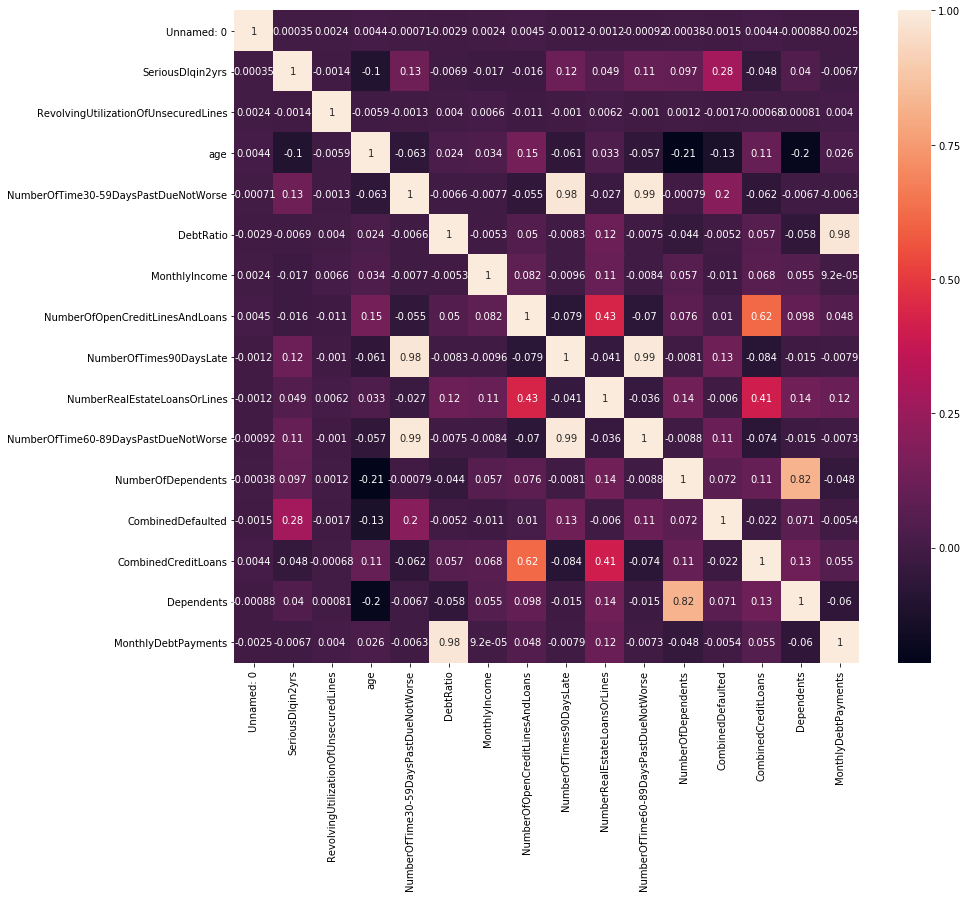

In [270]:
#looking at the correlation matrix to decide to retain or drop the engineered features
corr = train_data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2g")

In [271]:
# keeping the columns that gives more meaningful information on our target variable,dropping rest.
train_data.drop(["Unnamed: 0","NumberOfOpenCreditLinesAndLoans","NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse","NumberOfTime30-59DaysPastDueNotWorse","Dependents", "MonthlyDebtPayments"], axis=1, inplace=True)
test_data.drop(["Unnamed: 0","NumberOfOpenCreditLinesAndLoans","NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse","NumberOfTime30-59DaysPastDueNotWorse","Dependents", "MonthlyDebtPayments"], axis=1, inplace=True)


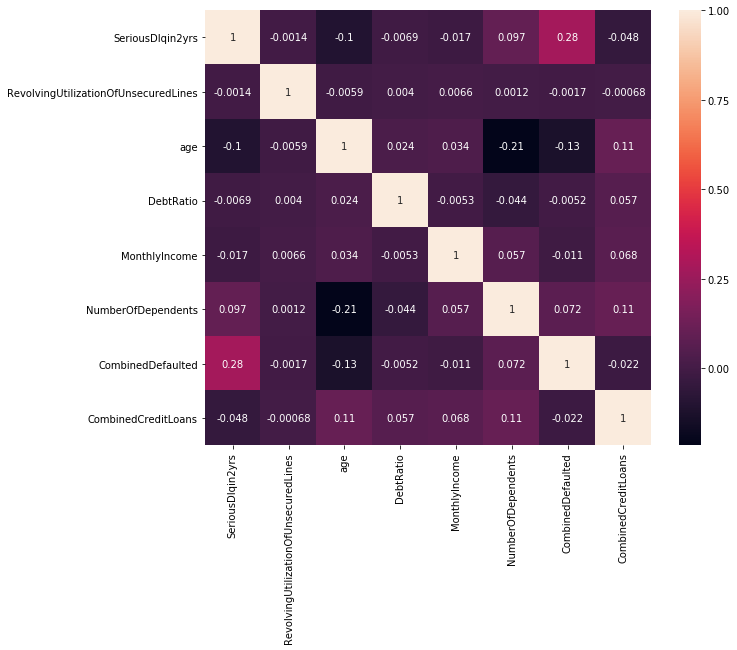

In [272]:
corr = train_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2g")

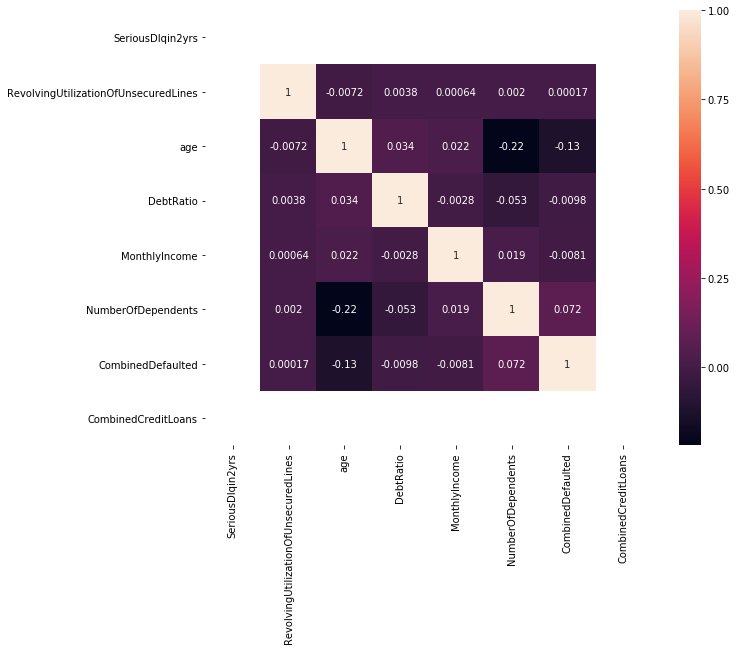

In [273]:
corr = test_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2g")

In [274]:
print((train_data["SeriousDlqin2yrs"]).value_counts())

train_data.describe()

0.0     139973
1.0      10026
52.0         1
Name: SeriousDlqin2yrs, dtype: int64


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfDependents,CombinedDefaulted,CombinedCreditLoans
count,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000
mean,0.067187,6.048778,52.295553,353.005420,6.673348e+03,0.737747,0.202420,0.742500
std,0.283466,249.755398,14.771249,2037.818468,1.288048e+04,1.114901,0.401805,0.437259
min,0.000000,0.000000,21.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.175074,3.903000e+03,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.366508,6.600000e+03,0.000000,0.000000,1.000000
75%,0.000000,0.559046,63.000000,0.868292,7.400000e+03,1.000000,0.000000,1.000000
max,52.000000,50708.000000,109.000000,329664.000000,3.008750e+06,52.000000,1.000000,1.000000


In [275]:
train_data=train_data[train_data["SeriousDlqin2yrs"] != 52]
test_data=train_data[train_data["SeriousDlqin2yrs"] != 52]

In [276]:
train_data.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
DebtRatio                               0
MonthlyIncome                           0
NumberOfDependents                      0
CombinedDefaulted                       0
CombinedCreditLoans                     0
dtype: int64

[(0, 20000)]

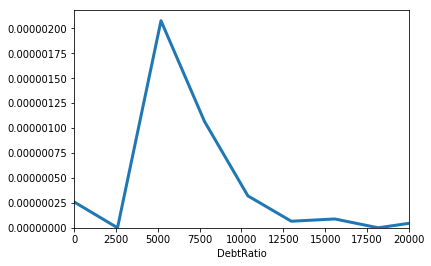

In [277]:
x= sns.distplot(train_data["DebtRatio"], hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
x.set(xlim=(0, 20000))

[(0, 20000)]

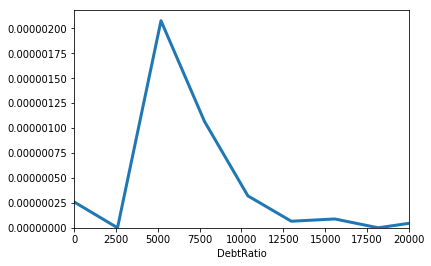

In [278]:
x= sns.distplot(test_data["DebtRatio"], hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
x.set(xlim=(0, 20000))

In [279]:
'''def binning(col, cut_points):

    labels = range(len(cut_points)+1)

    #Binning using cut function of pandas
    colBin = pd.cut(col,bins=cut_points,include_lowest=True)
    return colBin'''


'def binning(col, cut_points):\n\n    labels = range(len(cut_points)+1)\n\n    #Binning using cut function of pandas\n    colBin = pd.cut(col,bins=cut_points,include_lowest=True)\n    return colBin'

In [280]:
'''#age
cpt=list(range(int(train_data["age"].min()),int(train_data["age"].max()),10))+[int(train_data["age"].max())]
train_data["age_bin"]=pd.cut(train_data["age"],cpt, labels=False)

#NumberOfTime30-59DaysPastDueNotWorse
#cpt=list(range(0,60))+[int(train_data["age"].max())]
#train_data["NumberOfTime30-59DaysPastDueNotWorse_bin"]=pd.cut(train_data["NumberOfTime30-59DaysPastDueNotWorse"],cpt, labels=False)

#DebtRatio
bins=[]
for q in [0.2, 0.4, 0.6, 0.8, 1.0]:
    bins.append(train_data["DebtRatio"].quantile(q))

train_data["DebtRatio_bin"] = pd.cut(train_data["DebtRatio"], bins=bins, labels=False)
         
#MonthlyIncome
cpt=list(range(int(train_data["MonthlyIncome"].min()),int(train_data["MonthlyIncome"].max()),10))+[int(train_data["MonthlyIncome"].max())]
train_data["MonthlyIncome_bin"]=pd.cut(train_data["MonthlyIncome"],bins=15, labels=False)

train_data.dtypes'''

'#age\ncpt=list(range(int(train_data["age"].min()),int(train_data["age"].max()),10))+[int(train_data["age"].max())]\ntrain_data["age_bin"]=pd.cut(train_data["age"],cpt, labels=False)\n\n#NumberOfTime30-59DaysPastDueNotWorse\n#cpt=list(range(0,60))+[int(train_data["age"].max())]\n#train_data["NumberOfTime30-59DaysPastDueNotWorse_bin"]=pd.cut(train_data["NumberOfTime30-59DaysPastDueNotWorse"],cpt, labels=False)\n\n#DebtRatio\nbins=[]\nfor q in [0.2, 0.4, 0.6, 0.8, 1.0]:\n    bins.append(train_data["DebtRatio"].quantile(q))\n\ntrain_data["DebtRatio_bin"] = pd.cut(train_data["DebtRatio"], bins=bins, labels=False)\n         \n#MonthlyIncome\ncpt=list(range(int(train_data["MonthlyIncome"].min()),int(train_data["MonthlyIncome"].max()),10))+[int(train_data["MonthlyIncome"].max())]\ntrain_data["MonthlyIncome_bin"]=pd.cut(train_data["MonthlyIncome"],bins=15, labels=False)\n\ntrain_data.dtypes'

In [281]:
'''#age
cpt=list(range(int(test_data["age"].min()),int(test_data["age"].max()),10))+[int(test_data["age"].max())]
test_data["age_bin"]=pd.cut(test_data["age"],cpt, labels=False)

#NumberOfTime30-59DaysPastDueNotWorse
#cpt=list(range(0,60))+[int(test_data["age"].max())]
#test_data["NumberOfTime30-59DaysPastDueNotWorse_bin"]=pd.cut(test_data["NumberOfTime30-59DaysPastDueNotWorse"],cpt, labels=False)

#DebtRatio
bins=[]
for q in [0.2, 0.4, 0.6, 0.8, 1.0]:
    bins.append(test_data["DebtRatio"].quantile(q))

test_data["DebtRatio_bin"] = pd.cut(test_data["DebtRatio"], bins=bins, labels=False)
         
#MonthlyIncome
cpt=list(range(int(test_data["MonthlyIncome"].min()),int(test_data["MonthlyIncome"].max()),10))+[int(test_data["MonthlyIncome"].max())]
test_data["MonthlyIncome_bin"]=pd.cut(test_data["MonthlyIncome"],bins=15, labels=False)

test_data.dtypes'''


'#age\ncpt=list(range(int(test_data["age"].min()),int(test_data["age"].max()),10))+[int(test_data["age"].max())]\ntest_data["age_bin"]=pd.cut(test_data["age"],cpt, labels=False)\n\n#NumberOfTime30-59DaysPastDueNotWorse\n#cpt=list(range(0,60))+[int(test_data["age"].max())]\n#test_data["NumberOfTime30-59DaysPastDueNotWorse_bin"]=pd.cut(test_data["NumberOfTime30-59DaysPastDueNotWorse"],cpt, labels=False)\n\n#DebtRatio\nbins=[]\nfor q in [0.2, 0.4, 0.6, 0.8, 1.0]:\n    bins.append(test_data["DebtRatio"].quantile(q))\n\ntest_data["DebtRatio_bin"] = pd.cut(test_data["DebtRatio"], bins=bins, labels=False)\n         \n#MonthlyIncome\ncpt=list(range(int(test_data["MonthlyIncome"].min()),int(test_data["MonthlyIncome"].max()),10))+[int(test_data["MonthlyIncome"].max())]\ntest_data["MonthlyIncome_bin"]=pd.cut(test_data["MonthlyIncome"],bins=15, labels=False)\n\ntest_data.dtypes'

In [282]:
train_data.isnull().sum(),test_data.isnull().sum()

(SeriousDlqin2yrs                        0
 RevolvingUtilizationOfUnsecuredLines    0
 age                                     0
 DebtRatio                               0
 MonthlyIncome                           0
 NumberOfDependents                      0
 CombinedDefaulted                       0
 CombinedCreditLoans                     0
 dtype: int64, SeriousDlqin2yrs                        0
 RevolvingUtilizationOfUnsecuredLines    0
 age                                     0
 DebtRatio                               0
 MonthlyIncome                           0
 NumberOfDependents                      0
 CombinedDefaulted                       0
 CombinedCreditLoans                     0
 dtype: int64)

In [283]:
X = train_data.drop("SeriousDlqin2yrs", axis=1).copy()
y = train_data.SeriousDlqin2yrs
X.shape, y.shape

((149999, 7), (149999L,))

In [284]:
X_test = test_data.drop("SeriousDlqin2yrs", axis=1).copy()
y_test = test_data.SeriousDlqin2yrs
X_test.shape, y_test.shape

((149999, 7), (149999L,))

In [285]:
X_test.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
DebtRatio                               0
MonthlyIncome                           0
NumberOfDependents                      0
CombinedDefaulted                       0
CombinedCreditLoans                     0
dtype: int64

In [286]:
#options for model selection
from sklearn.utils.testing import all_estimators
estimators = all_estimators()

for name, class_ in estimators:
    if hasattr(class_, 'predict_proba'):
        print(name)

AdaBoostClassifier
BaggingClassifier
BayesianGaussianMixture
BernoulliNB
CalibratedClassifierCV
ComplementNB
DecisionTreeClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianMixture
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultinomialNB
NuSVC
QuadraticDiscriminantAnalysis
RandomForestClassifier
SGDClassifier
SVC
_BinaryGaussianProcessClassifierLaplace
_ConstantPredictor


In [287]:
from sklearn.metrics import roc_curve, roc_auc_score #AUC score
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42)
logit = LogisticRegression(random_state=42, solver="saga", penalty="l1", class_weight="balanced", C=1.0, max_iter=500)
scaler = StandardScaler().fit(X_train)

In [288]:
#Feature Scaling
X_train_scaled = scaler.transform(X_train) 
X_val_scaled = scaler.transform(X_val)

In [289]:
logit.fit(X_train_scaled, y_train)
logit_scores_proba = logit.predict_proba(X_train_scaled)
logit_scores = logit_scores_proba[:,1]

In [290]:
#AUC ROC plot
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, linewidth=2, label=label,color='red')
    plt.plot([0,1],[0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")

AUC Score for logit 0.802097459307


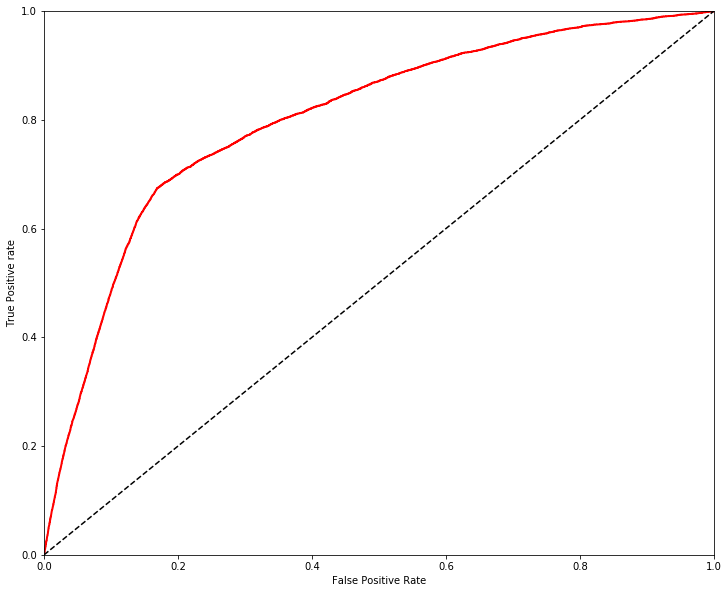

In [291]:
fpr_logit, tpr_logit, thresh_logit = roc_curve(y_train, logit_scores)
plot_roc_curve(fpr_logit,tpr_logit)
print("AUC Score for logit {}".format(roc_auc_score(y_train,logit_scores)))

AUC Score 0.802718274453


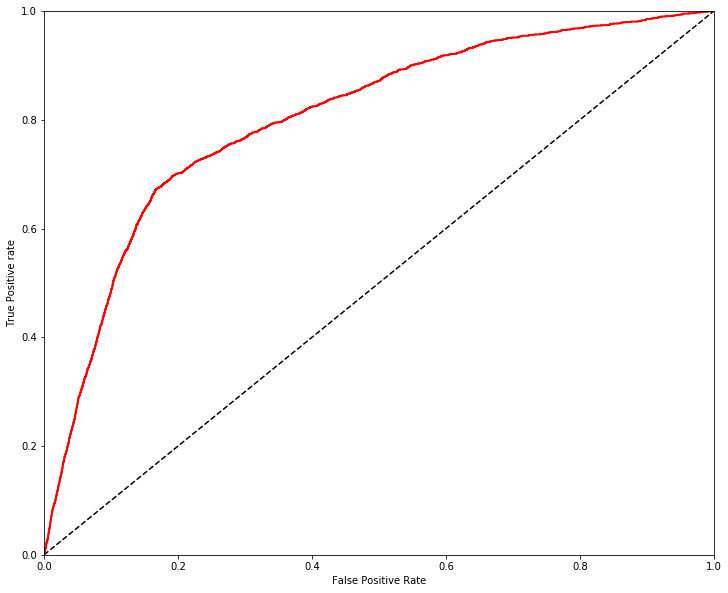

In [292]:
#validate with the validation set
logit_scores_proba_val = logit.predict_proba(X_val_scaled)
logit_scores_val = logit_scores_proba_val[:,1]
fpr_logit_val, tpr_logit_val, thresh_logit_val = roc_curve(y_val, logit_scores_val)
plot_roc_curve(fpr_logit_val,tpr_logit_val)
print("AUC Score {}".format(roc_auc_score(y_val,logit_scores_val)))

In [293]:
#logit feature weaights
weights = pd.Series(logit.coef_[0],
index=X_train.columns.values)
weights.sort_values(ascending = False)


CombinedDefaulted                       0.903510
NumberOfDependents                      0.063980
DebtRatio                              -0.007332
RevolvingUtilizationOfUnsecuredLines   -0.018563
CombinedCreditLoans                    -0.047961
MonthlyIncome                          -0.153501
age                                    -0.419838
dtype: float64

In [294]:
def plot_feature_importances(model):
    plt.figure(figsize=(10,8))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center',color='black')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature weight")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


In [295]:
#random forest model
forest = RandomForestClassifier(random_state=42,n_estimators=300, max_depth=5, class_weight="balanced")
forest.fit(X_train,y_train) 
y_scores_proba = forest.predict_proba(X_train)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_scores)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores)))

AUC Score 0.853320953942


AUC Score for random forest 0.853320953942


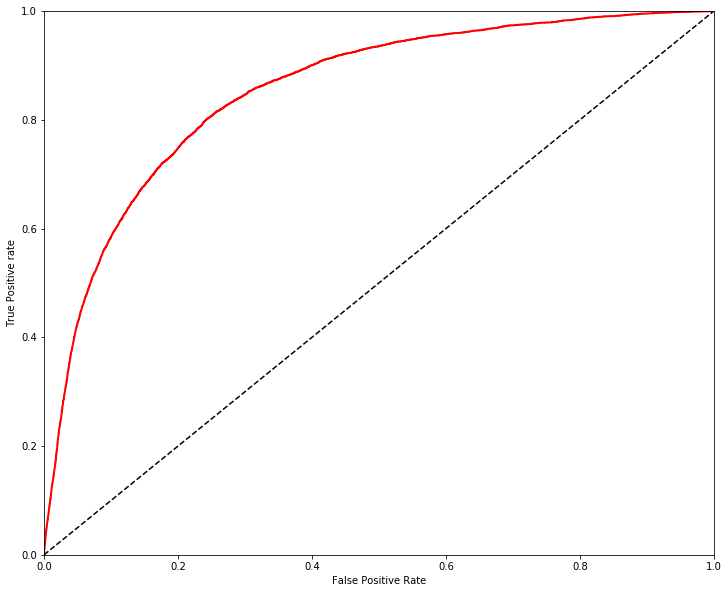

In [296]:
#randomforest
fpr, tpr, thresh = roc_curve(y_train, y_scores)
plot_roc_curve(fpr,tpr)
print("AUC Score for random forest {}".format(roc_auc_score(y_train,y_scores)))

AUC Score 0.848098024253


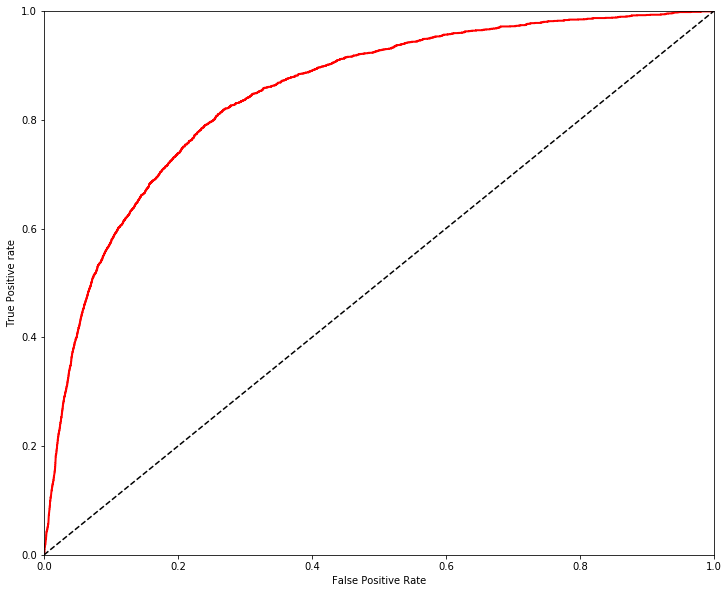

In [298]:
#cross validation
y_val_proba = forest.predict_proba(X_val)
y_scores_val = y_val_proba[:,1]
fpr_val, tpr_val, thresh_val = roc_curve(y_val, y_scores_val)
plot_roc_curve(fpr_val,tpr_val)
print("AUC Score {}".format(roc_auc_score(y_val,y_scores_val)))

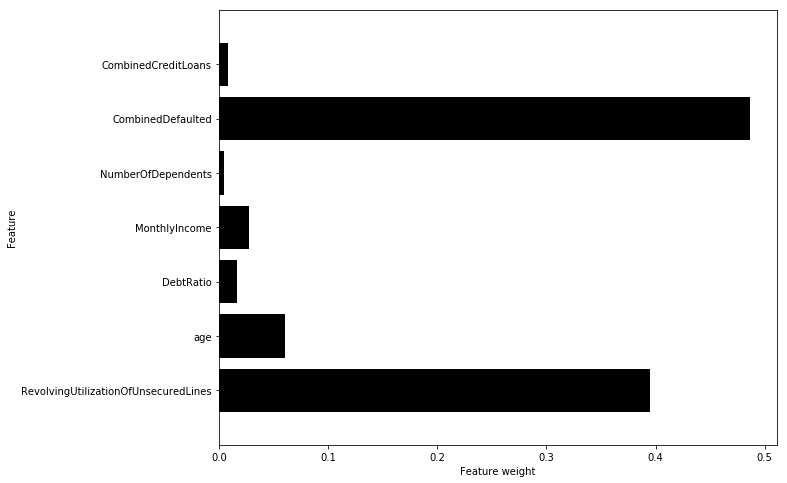

In [299]:
#feature imprtance graph
plot_feature_importances(forest)

In [300]:
#knearestneighbours classifier
knearest = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [301]:
#fitting the model
knearest.fit(X_train,y_train)
y_scores_proba = knearest.predict_proba(X_train)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_scores)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores)))

AUC Score 0.92314789958


AUC Score 0.579689594914


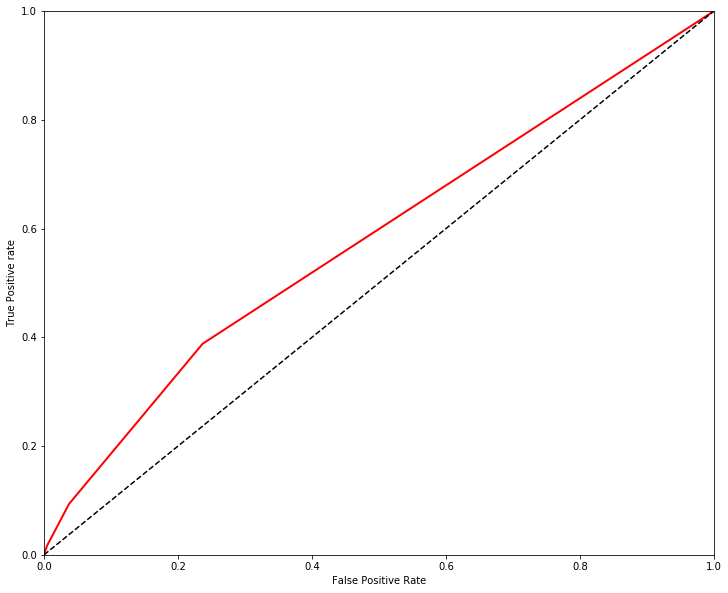

In [302]:
#check for over fitting 
y_val_proba = knearest.predict_proba(X_val)
y_scores_val = y_val_proba[:,1]
fpr_val, tpr_val, thresh_val = roc_curve(y_val, y_scores_val)
plot_roc_curve(fpr_val,tpr_val)
print("AUC Score {}".format(roc_auc_score(y_val,y_scores_val)))

AUC Score 0.92314789958


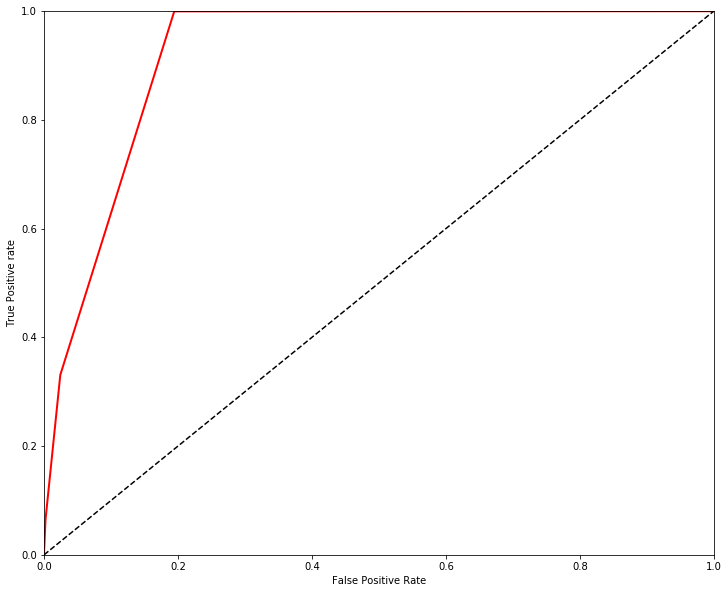

In [303]:
#auc roc plot
fpr, tpr, thresh = roc_curve(y_train, y_scores)
plot_roc_curve(fpr,tpr)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores)))

In [304]:
decisiontree=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [305]:
decisiontree.fit(X_train,y_train)
y_scores_proba = decisiontree.predict_proba(X_train)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_scores)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores)))

AUC Score 0.837314792791


AUC Score 0.837314792791


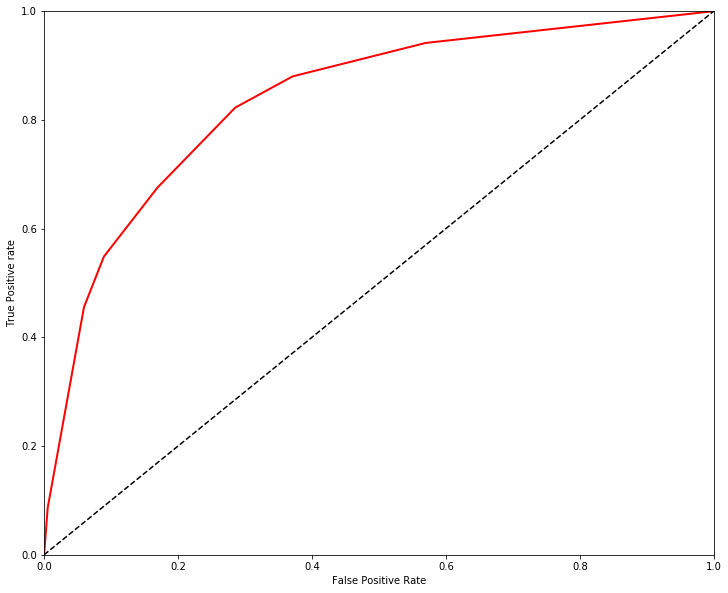

In [308]:

fpr, tpr, thresh = roc_curve(y_train, y_scores)
plot_roc_curve(fpr,tpr)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores)))

AUC Score 0.833817690879


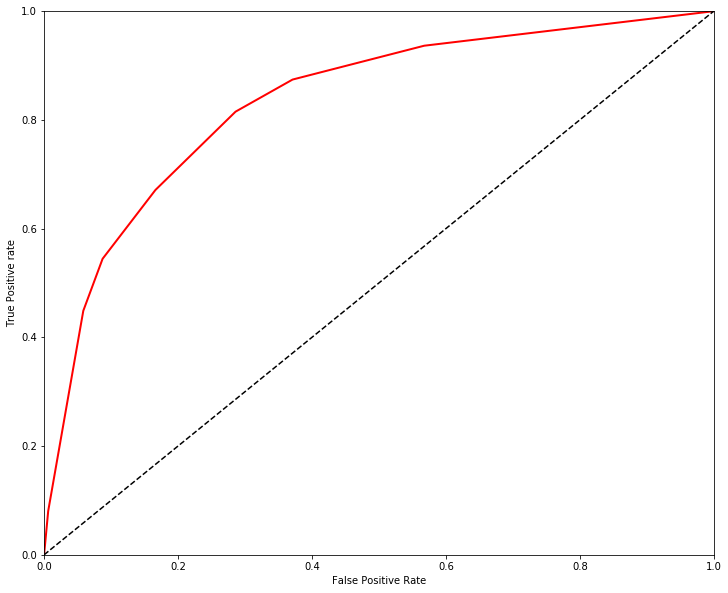

In [309]:
#check for over fitting with cross validation
y_val_proba = decisiontree.predict_proba(X_val)
y_scores_val = y_val_proba[:,1]
fpr_val, tpr_val, thresh_val = roc_curve(y_val, y_scores_val)
plot_roc_curve(fpr_val,tpr_val)
print("AUC Score {}".format(roc_auc_score(y_val,y_scores_val)))

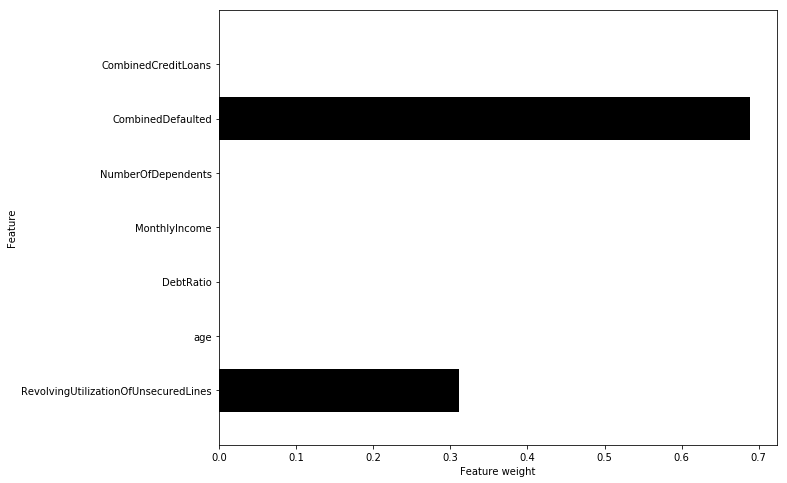

In [310]:
plot_feature_importances(decisiontree)

In [311]:
#quadratic disriminant analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis(0.1)
QDA.fit(X_train,y_train)
y_scores_proba = QDA.predict_proba(X_train)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_scores)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores)))

AUC Score 0.787589727101


AUC Score for QDA 0.787589727101


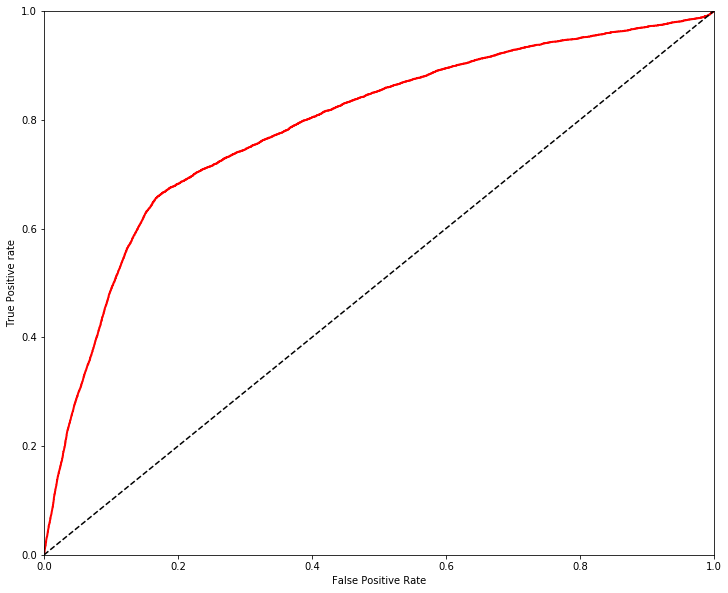

In [312]:
#auc for qda
fpr, tpr, thresh = roc_curve(y_train, y_scores)
plot_roc_curve(fpr,tpr)
print("AUC Score for QDA {}".format(roc_auc_score(y_train,y_scores)))

AUC Score 0.787557535424


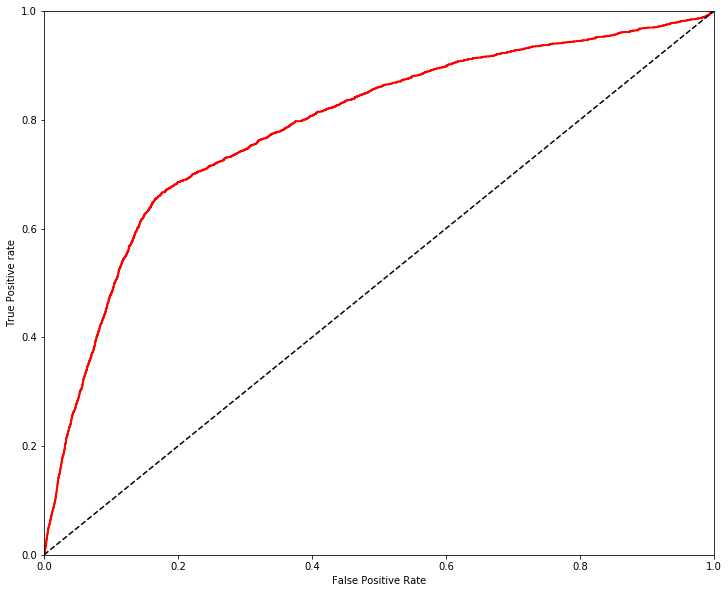

In [313]:
#check for over fitting with cross validation qda
y_val_proba = QDA.predict_proba(X_val)
y_scores_val = y_val_proba[:,1]
fpr_val, tpr_val, thresh_val = roc_curve(y_val, y_scores_val)
plot_roc_curve(fpr_val,tpr_val)
print("AUC Score {}".format(roc_auc_score(y_val,y_scores_val)))

In [314]:
from sklearn.ensemble import BaggingClassifier #bagging
bagclf=BaggingClassifier(base_estimator=decisiontree,n_estimators = 300, max_samples = 0.75, max_features = 0.75)

bagclf.fit(X_train,y_train)
y_scores_proba = bagclf.predict_proba(X_train)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_scores)
print("AUC Score Bagging classifier with desision tree base {}".format(roc_auc_score(y_train,y_scores)))

AUC Score Bagging classifier with desision tree base 0.847434067521


AUC Score 0.847434067521


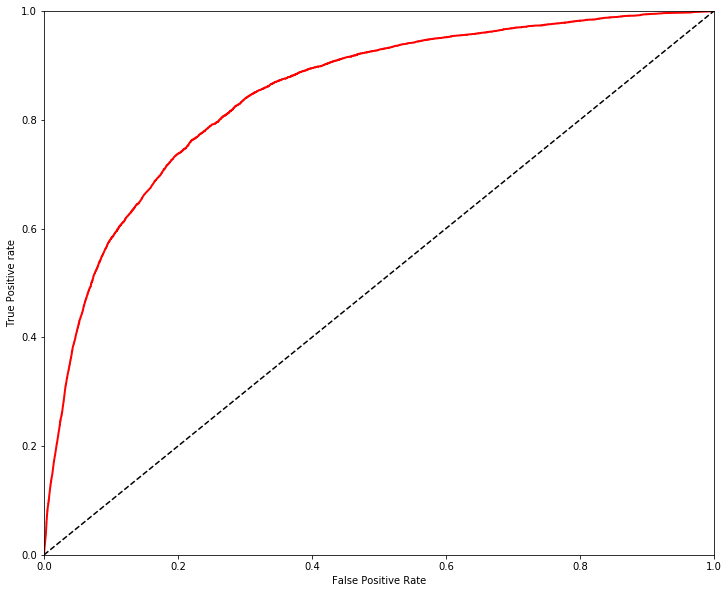

In [315]:
#bagging auc
fpr, tpr, thresh = roc_curve(y_train, y_scores)
plot_roc_curve(fpr,tpr)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores)))

AUC Score 0.845364578022


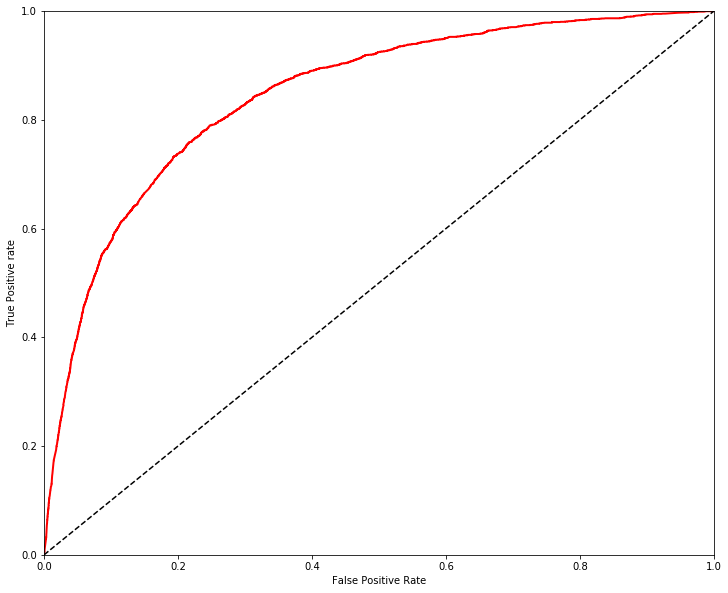

In [316]:
#check for over fitting bagging
y_val_proba = bagclf.predict_proba(X_val)
y_scores_val = y_val_proba[:,1]
fpr_val, tpr_val, thresh_val = roc_curve(y_val, y_scores_val)
plot_roc_curve(fpr_val,tpr_val)
print("AUC Score {}".format(roc_auc_score(y_val,y_scores_val)))

In [317]:
#gradient boosting
gbc_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, random_state=42)

gbc_clf.fit(X_train,y_train)
y_scores_proba = gbc_clf.predict_proba(X_train)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_scores)
print("AUC Score For Grdient boosting {}".format(roc_auc_score(y_train,y_scores)))

AUC Score For Grdient boosting 0.936242976825


AUC Score 0.936242976825


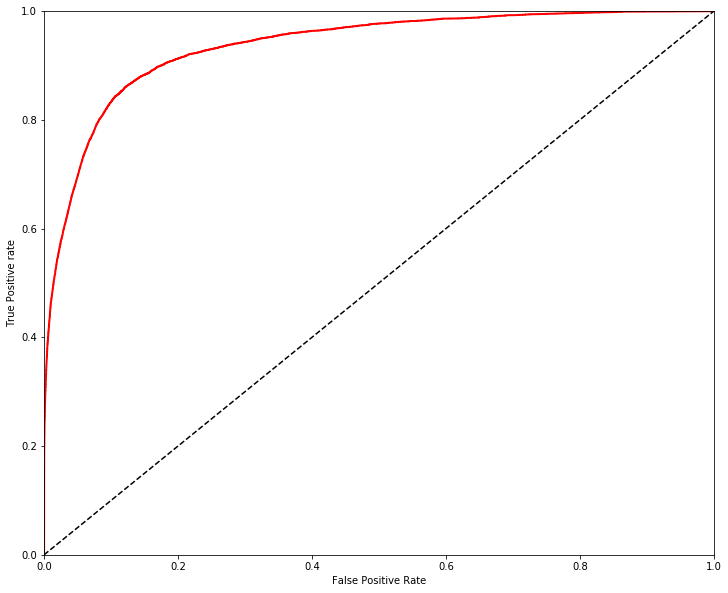

In [318]:
#auc plot gradient boosting
fpr, tpr, thresh = roc_curve(y_train, y_scores)
plot_roc_curve(fpr,tpr)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores)))

AUC Score 0.846592791732


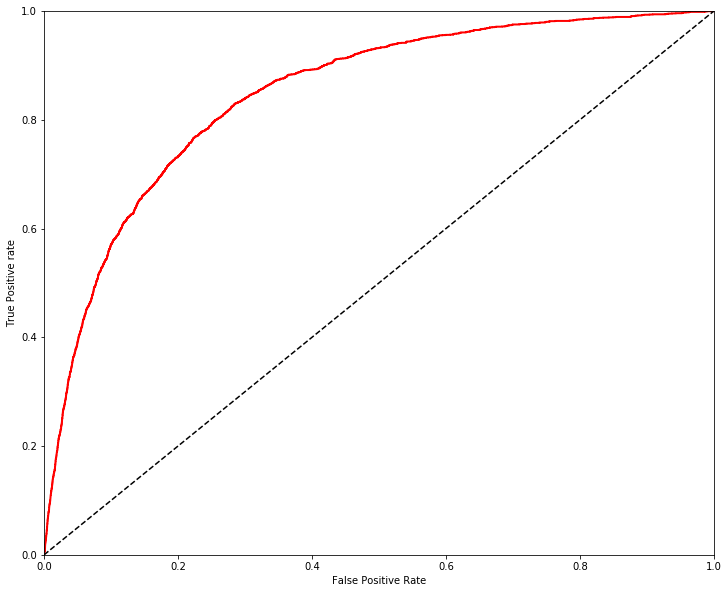

In [319]:
#check for over fitting  gradient boosting using cross validtion
y_val_proba = gbc_clf.predict_proba(X_val)
y_scores_val = y_val_proba[:,1]
fpr_val, tpr_val, thresh_val = roc_curve(y_val, y_scores_val)
plot_roc_curve(fpr_val,tpr_val)
print("AUC Score {}".format(roc_auc_score(y_val,y_scores_val)))

In [320]:
#bagging with randomforest base taking too long
'''bagclf=BaggingClassifier(base_estimator=forest,n_estimators = 300, max_samples = 0.75, max_features = 0.75)
bagclf.fit(X_train,y_train)
y_scores_proba = bagclf.predict_proba(X_train)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_scores)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores)))
fpr, tpr, thresh = roc_curve(y_train, y_scores)
plot_roc_curve(fpr,tpr)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores)))'''

'bagclf=BaggingClassifier(base_estimator=forest,n_estimators = 300, max_samples = 0.75, max_features = 0.75)\nbagclf.fit(X_train,y_train)\ny_scores_proba = bagclf.predict_proba(X_train)\ny_scores = y_scores_proba[:,1]\nfpr, tpr, thresh = roc_curve(y_train, y_scores)\nprint("AUC Score {}".format(roc_auc_score(y_train,y_scores)))\nfpr, tpr, thresh = roc_curve(y_train, y_scores)\nplot_roc_curve(fpr,tpr)\nprint("AUC Score {}".format(roc_auc_score(y_train,y_scores)))'

In [ ]:
#svc
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', gamma=0.8, C=12)
svm_model.fit(X_train,y_train)
y_scores_proba = svm_model.predict_proba(X_train)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_scores)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores)))
fpr, tpr, thresh = roc_curve(y_train, y_scores)

In [ ]:
#svc plot
plot_roc_curve(fpr,tpr)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores)))

In [ ]:
#check for over fitting svc using cross validtion
y_val_proba = svm_model.predict_proba(X_val)
y_scores_val = y_val_proba[:,1]
fpr_val, tpr_val, thresh_val = roc_curve(y_val, y_scores_val)
plot_roc_curve(fpr_val,tpr_val)
print("AUC Score {}".format(roc_auc_score(y_val,y_scores_val)))

In [321]:
#xgb
import xgboost as xgb

xgb_model = xgb.XGBClassifier(learning_rate= 0.1, n_estimators= 1000, max_depth= 5, min_child_weight= 1, gamma= 0)

xgb_model.fit(X_train,y_train)
y_scores_proba = xgb_model.predict_proba(X_train)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_scores)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores)))

AUC Score 0.926391013785


AUC Score 0.926391013785


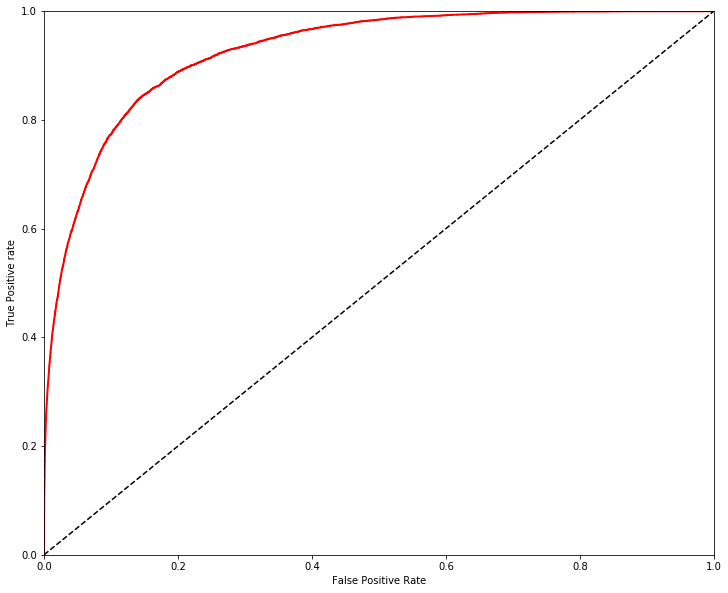

In [322]:
#xbg plot
fpr, tpr, thresh = roc_curve(y_train, y_scores)
plot_roc_curve(fpr,tpr)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores)))

AUC Score 0.842776415245


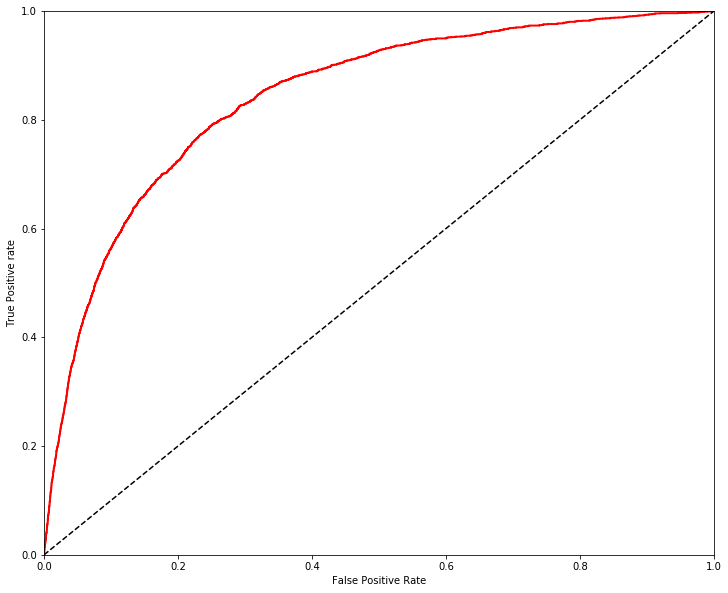

In [323]:
#cross validation for xgb
y_val_proba = xgb_model.predict_proba(X_val)
y_scores_val = y_val_proba[:,1]
fpr_val, tpr_val, thresh_val = roc_curve(y_val, y_scores_val)
plot_roc_curve(fpr_val,tpr_val)
print("AUC Score {}".format(roc_auc_score(y_val,y_scores_val)))